In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
df=pd.read_csv('fare.csv')

In [6]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied
0,748,2.75,1,75.00,24,6.300,0
1,1187,3.43,1,105.00,24,13.200,0
2,730,3.12,1,71.25,0,26.625,1
3,671,5.63,3,90.00,0,9.750,0
4,329,2.09,1,45.00,12,13.200,0


In [11]:
df.shape

(209673, 7)

In [12]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'surge_applied'],
      dtype='object')

In [13]:
#null values

In [14]:
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
surge_applied         0
dtype: int64

In [17]:
#descriptive analystics
#EDA
df.dtypes

trip_duration           int64
distance_traveled     float64
num_of_passengers       int64
fare                  float64
tip                     int64
miscellaneous_fees    float64
surge_applied           int64
dtype: object

In [18]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,1.000000


In [19]:
df['trip_duration']

0          748
1         1187
2          730
3          671
4          329
          ... 
209668    1617
209669     438
209670     571
209671     491
209672    3614
Name: trip_duration, Length: 209673, dtype: int64

<Axes: xlabel='trip_duration', ylabel='Density'>

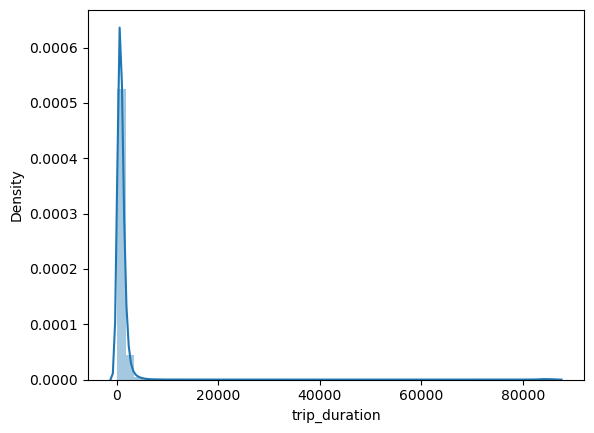

In [25]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df['trip_duration'])

In [23]:
#distane travelled with trip_duration

dff=df[['trip_duration','distance_traveled']]
dff=dff[dff['trip_duration']==0]
dff

,trip_duration,distance_traveled
1762,0,0.02
3074,0,0.18
4108,0,0.16
4535,0,0.02
12418,0,0.06
15019,0,7.19
36462,0,0.06
46617,0,0.11
51024,0,0.05
51257,0,0.43


In [26]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'surge_applied'],
      dtype='object')

In [28]:
df['num_of_passengers'].unique()

array([1, 3, 2, 0, 6, 5, 4, 8, 7, 9], dtype=int64)

In [32]:
dff=df[['trip_duration','distance_traveled','num_of_passengers']]
dff=dff[dff['num_of_passengers']==0]
dff

,trip_duration,distance_traveled,num_of_passengers
14,234,1.61,0
380,584,1.93,0
426,1548,4.02,0
459,471,2.90,0
1523,436,2.09,0
...,...,...,...
208592,1148,4.67,0
208679,240,0.97,0
208707,2443,6.92,0
208909,656,2.74,0


In [33]:
dff_index=df[df['num_of_passengers']==0].index
dff_index

Index([    14,    380,    426,    459,   1523,   1836,   2130,   2336,   2461,
         2496,
       ...
       207263, 207539, 208084, 208488, 208504, 208592, 208679, 208707, 208909,
       209017],
      dtype='int64', length=753)

In [34]:
df=df.drop(dff_index,axis=0)

In [35]:
df.shape

(208920, 7)

In [7]:
#feature engineering
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied
0,748,2.75,1,75.00,24,6.300,0
1,1187,3.43,1,105.00,24,13.200,0
2,730,3.12,1,71.25,0,26.625,1
3,671,5.63,3,90.00,0,9.750,0
4,329,2.09,1,45.00,12,13.200,0


In [8]:
df['total_fare']=df['fare']+df['miscellaneous_fees']

In [38]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied,total_fare
0,748,2.75,1,75.00,24,6.300,0,81.300
1,1187,3.43,1,105.00,24,13.200,0,118.200
2,730,3.12,1,71.25,0,26.625,1,97.875
3,671,5.63,3,90.00,0,9.750,0,99.750
4,329,2.09,1,45.00,12,13.200,0,58.200


In [39]:
df=df.drop(['fare','tip','miscellaneous_fees'],axis=1)

In [40]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,surge_applied,total_fare
0,748,2.75,1,0,81.300
1,1187,3.43,1,0,118.200
2,730,3.12,1,1,97.875
3,671,5.63,3,0,99.750
4,329,2.09,1,0,58.200


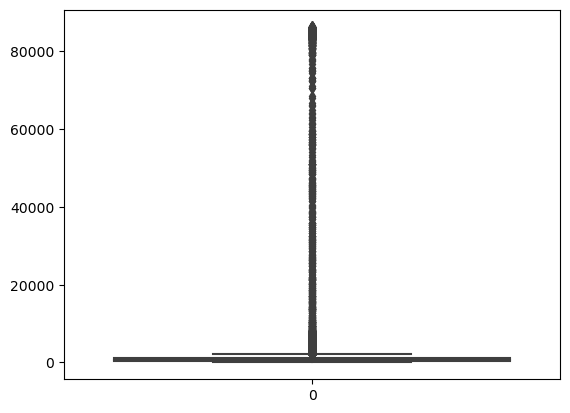

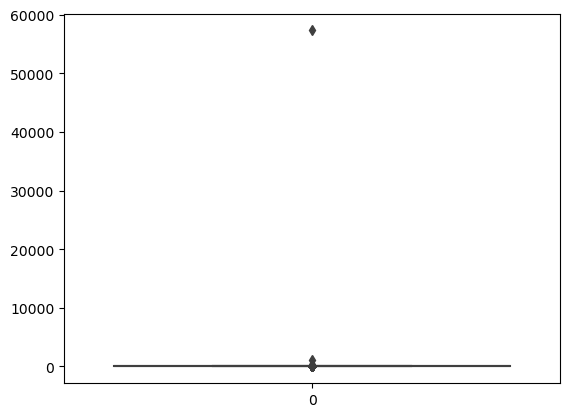

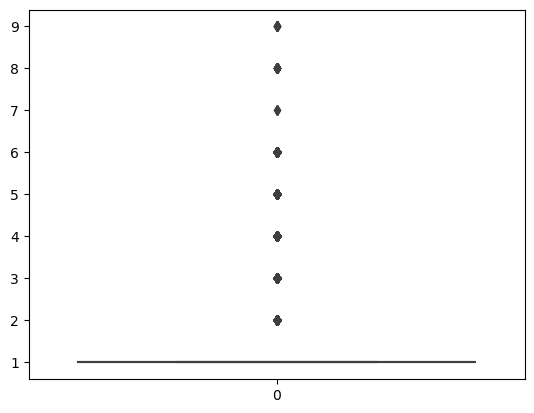

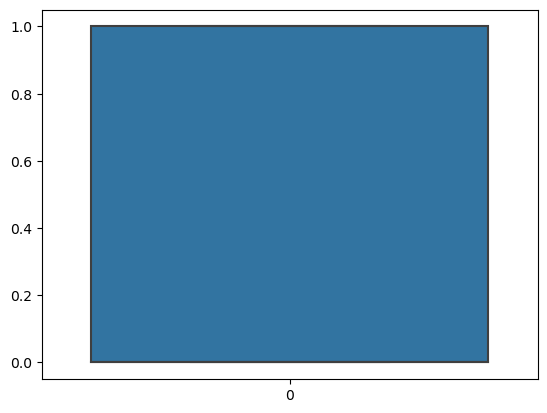

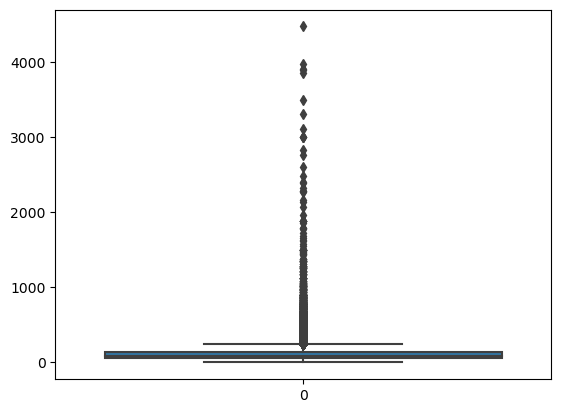

In [50]:
#outliers
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [10]:
def outlier_detection(data):
    df1=data.columns
    shape= data.shape
    
    for i in df1:
        print(f"processing columns : {i}")
        print(f"old shape : {shape}")
        
        data_frame=data[i]
        q1=data_frame.quantile(0.25)
        q3=data_frame.quantile(0.75)
        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q3+1.5*iqr
        
        outliers=data[(data[i]<lower)|(data[i]>upper)]
        data.drop(index = outliers.index,inplace=True)
        print(f"new shape:{data.shape}")
        
    return data

In [11]:
fin_df=outlier_detection(df)

processing columns : trip_duration
old shape : (209673, 8)
new shape:(197774, 8)
processing columns : distance_traveled
old shape : (209673, 8)
new shape:(183192, 8)
processing columns : num_of_passengers
old shape : (209673, 8)
new shape:(157266, 8)
processing columns : fare
old shape : (209673, 8)
new shape:(154907, 8)
processing columns : tip
old shape : (209673, 8)
new shape:(153715, 8)
processing columns : miscellaneous_fees
old shape : (209673, 8)
new shape:(153472, 8)
processing columns : surge_applied
old shape : (209673, 8)
new shape:(153472, 8)
processing columns : total_fare
old shape : (209673, 8)
new shape:(152879, 8)


In [57]:
#MLR multiple linear regression

In [12]:
fin_df.shape

(152879, 8)

In [14]:
fin_df.corr()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied,total_fare
trip_duration,1.000000,0.744816,NaN,0.898407,0.285918,0.278782,0.297240,0.874930
distance_traveled,0.744816,1.000000,NaN,0.897650,0.315765,0.308748,0.321055,0.882439
num_of_passengers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare,0.898407,0.897650,NaN,1.000000,0.319369,0.277805,0.308838,0.964995
tip,0.285918,0.315765,NaN,0.319369,1.000000,0.357687,0.357722,0.381621
miscellaneous_fees,0.278782,0.308748,NaN,0.277805,0.357687,1.000000,0.925249,0.520025
surge_applied,0.297240,0.321055,NaN,0.308838,0.357722,0.925249,1.000000,0.527211
total_fare,0.874930,0.882439,NaN,0.964995,0.381621,0.520025,0.527211,1.000000


In [15]:
#MLR multiple linear regression

x=fin_df.drop("total_fare",axis=1)
y=fin_df['total_fare']

In [16]:
y.head()

0     81.300
1    118.200
2     97.875
4     58.200
5     71.625
Name: total_fare, dtype: float64

In [17]:
x.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied
0,748,2.75,1,75.00,24,6.300,0
1,1187,3.43,1,105.00,24,13.200,0
2,730,3.12,1,71.25,0,26.625,1
4,329,2.09,1,45.00,12,13.200,0
5,355,1.74,1,45.00,0,26.625,1


In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20, random_state=10)

In [34]:
xtrain.shape,ytrain.shape

((122303, 7), (122303,))

In [37]:
xtest.shape,ytest.shape

((30576, 7), (30576,))

In [46]:
model=LinearRegression().fit(xtrain, ytrain)

In [48]:
model.coef_

array([ 6.71852360e-16, -2.46026430e-14,  6.93889390e-18,  1.00000000e+00,
       -1.64535611e-16,  1.00000000e+00,  1.03838336e-15])

In [49]:
model.intercept_

-5.115907697472721e-13

In [51]:
prediction=model.predict(xtest)

In [57]:
pred_table= pd.DataFrame()

In [59]:
pred_table['prediction']=prediction

In [60]:
pred_table['actual']=ytest

In [61]:
pred_table

,prediction,actual
0,84.750,81.30
1,66.000,118.20
2,36.000,NaN
3,62.250,NaN
4,154.125,NaN
...,...,...
30571,109.475,NaN
30572,39.750,NaN
30573,92.700,NaN
30574,84.250,129.75


In [62]:
from sklearn.metrics import r2_score

In [64]:
r2_score(ytest,prediction)

1.0

In [66]:
model=sm.OLS(y,x).fit()

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_fare   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.363e+29
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:44:36   Log-Likelihood:             3.6948e+06
No. Observations:              152879   AIC:                        -7.390e+06
Df Residuals:                  152872   BIC:                        -7.390e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
trip_duration        9.73e-15   1.29e-16     75.609      0.000    9.48e-15    9.98e-15
distance_traveled  -2.048e-14   2.42e-14     -0.847      0.397   -6.79e-14    2.69e-14
num_of_passengers  -4.724e-14   7.83e-14     -0.604      0.546   -2.01e-13    1.06e-13
fare                   1.0000   2.31e-15   4.32e+14      0.000       1.000       1.000
tip                -6.349e-16   1.97e-15     -0.322      0.747    -4.5e-15    3.23e-15
miscellaneous_fees     1.0000   5.47e-15   1.83e+14      0.000       1.000       1.000
surge_applied      -4.441e-15   1.21e-13     -0.037      0.971   -2.42e-13    2.33e-13
==============================================================================
Omnibus:                    13342.108   Durbin-Watson:                   0.452
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17104.008
Skew:                          -0.793   Prob(JB):                         0.00
Kurtosis:                       3.412   Cond. No.                     5.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""